##  Writing a Data Science Blog Post 

In [12]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Business Understanding

### Dataset Justification

>The simple reason behind choosing this dataset is I am a big football fan myself and always wanted to do some analysis based on football datasets.

### Key Questions

> 1. Who are the Top 10 most Valuable Players?
> 2. Which are Top 10 Clubs having most Valuable Players?
> 3. Who are the Top 10 Highly Paid Players?
> 4. Which are Top 10 Clubs having most Highly Paid Players?
> 5. Are the higher valued players always paid more, i.e, what is the correlation between value and wage?

# 2. Data Understanding

In [2]:
#Read the dataset
df = pd.read_csv('fifa19.csv')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
#Shape of the dataset
print(df.shape)
df.info()

(18207, 89)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159

In [5]:
#Checking for Missing values
((df.isnull().sum() / df.shape[0]) * 100).sort_values(ascending = False)

Loaned From             93.057615
LWB                     11.451639
LM                      11.451639
CB                      11.451639
LCB                     11.451639
LB                      11.451639
RWB                     11.451639
RDM                     11.451639
CDM                     11.451639
LDM                     11.451639
RM                      11.451639
RCM                     11.451639
CM                      11.451639
LCM                     11.451639
RAM                     11.451639
RB                      11.451639
CAM                     11.451639
LAM                     11.451639
RW                      11.451639
RF                      11.451639
CF                      11.451639
LF                      11.451639
LW                      11.451639
RS                      11.451639
ST                      11.451639
LS                      11.451639
RCB                     11.451639
Release Clause           8.590103
Joined                   8.529686
Contract Valid

Here we see 'Loaned From' column has 93% of the values missing. Thus we are dropping this variable as they are anyways not needed to the answer our Business Questions

# 3. Data Preparation

In [6]:
#Dropping unnecessary columns
drop_columns = ['Unnamed: 0', 'Photo', 'Flag','Club Logo',  
                'Real Face', 'Jersey Number', 'Loaned From',
                'Height', 'Weight','LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
                'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
                'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Release Clause']

df_1 = df.copy()
df_1.drop(drop_columns, axis=1, inplace=True)
df_1.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [7]:
#Data cleaning for value and wage column
def convert(string):
    """
    This function will convert string to float

    Parameter:
    amount(string): Amount in string with abbreviated M for Million and K for Thousands
    
    Returns:
    float: A float number represents the Amount in millions
    """
    
    if string[-1] == 'M':
        return float(string[1:-1])*1
    elif string[-1] == 'K':
        return ((float(string[1:-1])*1000) / 1000000)
    else:
        return float(string[1:])

In [17]:
df_2 = df_1.copy()
df_2['Value_in_Euros_in_M'] = df_2['Value'].apply(lambda x: convert(x))
df_2['Wage_in_Euros_in_M'] = df_2['Wage'].apply(lambda x: convert(x))
df_2.drop(['Value', 'Wage'], axis = 1, inplace = True)
df_2.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Special,Preferred Foot,International Reputation,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value_in_Euros_in_M,Wage_in_Euros_in_M
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,2202,Left,5.0,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,110.5,0.565
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,2228,Right,5.0,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,77.0,0.405
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,2143,Right,5.0,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,118.5,0.290
3,193080,De Gea,27,Spain,91,93,Manchester United,1471,Right,4.0,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,72.0,0.260
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,2281,Right,4.0,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,102.0,0.355


# 4. Answering the Questions

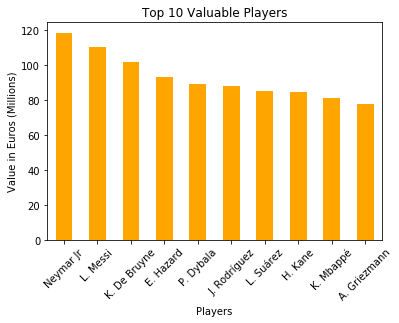

In [20]:
# Question 1. Who are the Top 10 most Valuable Players?
df_2.groupby('Name')['Value_in_Euros_in_M'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', color = 'orange')
plt.title('Top 10 Valuable Players')
plt.xlabel('Players')
plt.ylabel('Value in Euros (Millions)')
plt.xticks(rotation = 45);
plt.show()

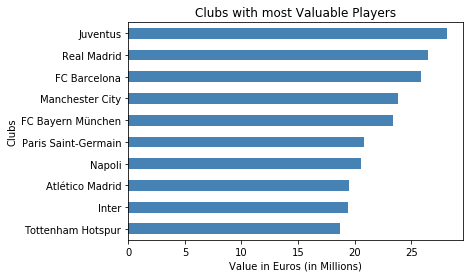

In [21]:
# Question2. Which are the Top 10 Clubs having more Valuable Players?
top10_players_value = df_2.groupby('Club')['Value_in_Euros_in_M'].mean().sort_values(ascending = False).head(10)
top10_players_value.sort_values(ascending = True).plot(kind = 'barh', color = 'steelblue')
plt.title('Clubs with most Valuable Players')
plt.ylabel('Clubs')
plt.xlabel('Value in Euros (in Millions)')
plt.xticks(rotation = 0);
plt.show()

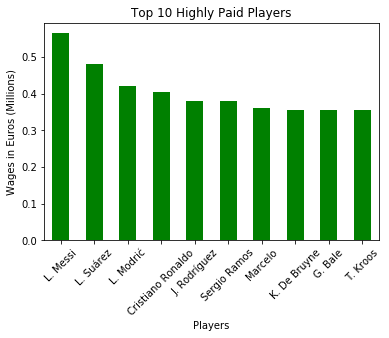

In [23]:
# Question 3. Who are the Top 10 Highly Paid Players?
df_2.groupby('Name')['Wage_in_Euros_in_M'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', color = 'green')
plt.title('Top 10 Highly Paid Players')
plt.xlabel('Players')
plt.ylabel('Wages in Euros (Millions)')
plt.xticks(rotation = 45);
plt.show()

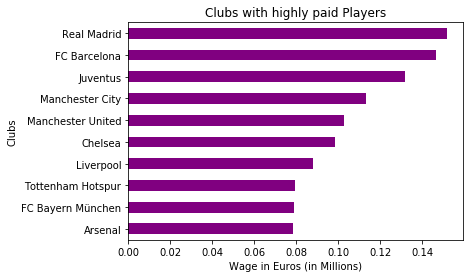

In [25]:
# Question 5. Which are Top 10 Clubs having Highly Paid Players?
top10_players_wage = df_2.groupby('Club')['Wage_in_Euros_in_M'].mean().sort_values(ascending = False).head(10)
top10_players_wage.sort_values(ascending = True).plot(kind = 'barh', color = 'purple')
plt.title('Clubs with highly paid Players')
plt.ylabel('Clubs')
plt.xlabel('Wage in Euros (in Millions)')
plt.xticks(rotation = 0);
plt.show()

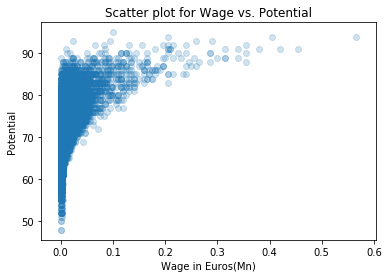

In [31]:
#Question5.Are the higher valued players always paid more, i.e, what is the correlation between value and wage?
plt.scatter(df_2['Wage_in_Euros_in_M'] , df_2['Potential'],alpha=0.2)
plt.title('Scatter plot for Wage vs. Potential')
plt.xlabel('Wage in Euros(Mn)')
plt.ylabel('Potential')
plt.show()